In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

full_data = pd.read_csv("User_Data.csv")
#print(full_data)

full_data = full_data.drop("User ID", axis = 1)
#print(full_data)

full_data['Gender'] = full_data['Gender'].replace({'Male':0, 'Female':1})
#print(full_data)

X_full_data = full_data[['Gender','Age','EstimatedSalary','Purchased']].values
#print(X_full_data)
X_training = X_full_data[:200,:]
print(X_training)

Y_full_data = full_data[['Purchased']].values
Y_training = Y_full_data[:200,:]
print(Y_training)
#print(Y_full_data)

observations,features = X_full_data.shape
#print(observations,features)
print(X_full_data.shape)
print(Y_full_data.shape)
X_training_final = X_training.T
Y_training_final = Y_training.T
X_final_data = X_full_data.T
Y_final_data = Y_full_data.T



[[     0     19  19000      0]
 [     0     35  20000      0]
 [     1     26  43000      0]
 [     1     27  57000      0]
 [     0     19  76000      0]
 [     0     27  58000      0]
 [     1     27  84000      0]
 [     1     32 150000      1]
 [     0     25  33000      0]
 [     1     35  65000      0]
 [     1     26  80000      0]
 [     1     26  52000      0]
 [     0     20  86000      0]
 [     0     32  18000      0]
 [     0     18  82000      0]
 [     0     29  80000      0]
 [     0     47  25000      1]
 [     0     45  26000      1]
 [     0     46  28000      1]
 [     1     48  29000      1]
 [     0     45  22000      1]
 [     1     47  49000      1]
 [     0     48  41000      1]
 [     1     45  22000      1]
 [     0     46  23000      1]
 [     0     47  20000      1]
 [     0     49  28000      1]
 [     1     47  30000      1]
 [     0     29  43000      0]
 [     0     31  18000      0]
 [     0     31  74000      0]
 [     1     27 137000      1]
 [     1

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19868\250934439.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  full_data['Gender'] = full_data['Gender'].replace({'Male':0, 'Female':1})


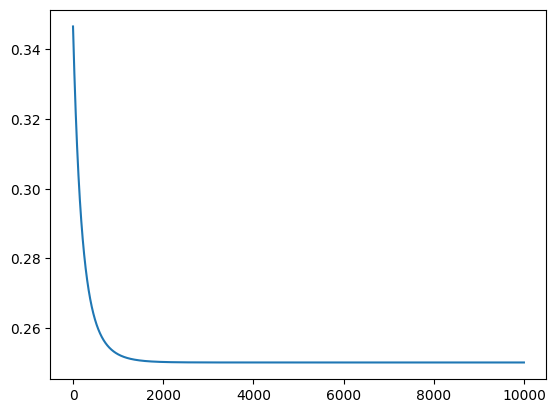

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def logistic_regression(iter,learning_rate,Y,X):
    m,n = X_full_data.shape
    w = np.zeros((n,1))
    b = 0
    cost_list = []
    for i in range(iter):
        linear_prediction = np.dot(w.T,X) + b
        prediction = sigmoid(linear_prediction)

        cost = -(1/m)*np.sum( Y*np.log(prediction) + (1-Y)*np.log(1-prediction))
        dW = (1/m)*np.dot(prediction-Y, X.T)
        dB = (1/m)*np.sum(prediction - Y)

        w = w - learning_rate*dW.T
        b = b - learning_rate*dB

        cost_list.append(cost)
    return w, b, cost_list

lr = 0.000000000005
iter = 10000
w, b, cost_list = logistic_regression(iter,lr,Y_training_final,X_training_final) 
plt.plot(np.arange(iter), cost_list)
plt.show() 

In [4]:
def accuracy(X, Y, W, B):
    
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)
    
    A = A > 0.5
    
    A = np.array(A, dtype = 'int64')
    
    acc = (1 - np.sum(np.absolute(A - Y))/Y.shape[1])*100
    
    print("Accuracy of the model is : ", round(acc, 2), "%")
accuracy(X_final_data, Y_final_data, w, b)

Accuracy of the model is :  64.25 %
